<a href="https://colab.research.google.com/github/nikenaml/time-series-household-electric-power-consumption/blob/master/prodiction-household-electric-power-consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Information

    Nama     : Niken Amelia
    Email    : niken.aml99@gmail.com
    No. HP   : 085311321124
    LinkedIn : https://www.linkedin.com/in/nikenamelia/
    Github   : https://github.com/nikenaml

# Introduction Dataset

### Household Electric Power Consumption
Link Dataset : https://www.kaggle.com/uciml/electric-power-consumption-data-set

This database have 2,075,259 rows and 7 columns.

Database information:

- date: Date in format dd/mm/yyyy
- time: time in format hh:mm:ss
- global_active_power: household global minute-averaged active power (in kilowatt)
- global_reactive_power: household global minute-averaged reactive power (in kilowatt)
- voltage: minute-averaged voltage (in volt)
- global_intensity: household global minute-averaged current intensity (in ampere)
- sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Download dataset from Kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "nikenamelia" # username from the json file
os.environ['KAGGLE_KEY'] = "d81f627b9699f95aa938e378544c3488" # key from the json file
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
!kaggle datasets download -d uciml/electric-power-consumption-data-set # api copied from kaggle

 72% 14.0M/19.4M [00:00<00:00, 143MB/s]
100% 19.4M/19.4M [00:00<00:00, 124MB/s]


In [ ]:
#unzip
!mkdir dataset
!unzip electric-power-consumption-data-set.zip -d dataset
!ls dataset

Archive:  electric-power-consumption-data-set.zip
  inflating: dataset/household_power_consumption.txt  
household_power_consumption.txt


## Load Data

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import re
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 2000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [ ]:
# read dataset
data = pd.read_csv("dataset/household_power_consumption.txt", 
                   sep=';', 
                   parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                   low_memory=False, na_values=['nan','?'], index_col='dt')
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


# Data Understanding

## EDA

In [ ]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
# check columns
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
# total data
data.shape

(2075259, 7)

This database have 2,075,259 rows and 7 columns. Let's check the NA data.

### Handling Missing Value

In [ ]:
# null check
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

- To fill in the average value, you must first see whether the data has an outlier or not. If there are outliers from the data, then using the mean or median of the data is a safer way.

- For this reason, it was decided to check the median and mean values of each column containing blank data as well as the min and max values.

In [ ]:
# Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


#### Check data description for analysis
Change the format of .describe() for analysis

In [ ]:
"""
DataFrames do not allow to treat one row as an integer and another row as a float.
However, if you want to convert the contents of a DataFrame into a string, 
then the developer is full controls how values are displayed because all 
values are just strings.

how to find out the value of 10% mae on the model in the overall scale of the dataset?
# 10% mae = 10% x (max - min)

note: MAE is below 10% of the data scale, for example the data scale is 150, meaning that the MAE is at least 15
"""


""" optional
pd.options.display.float_format = "{:.3f}".format
data.describe()
"""
dsc = data.describe()
dsc.loc['count'] = dsc.loc['count'].astype(int).astype(str)
dsc.iloc[1:] = dsc.iloc[1:].applymap('{:.4f}'.format)
dsc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2049280,2049280,2049280,2049280,2049280,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000


- For the distribution of mean and median values in all columns, it can be seen that the distribution is not too far away and the data range is small. While the distribution of min and max values has a value that is quite far with a fairly wide data range, especially in the columns "Global_active_power", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3".

- To minimize data that has outliers in time series cases, a safer way is to fill in the missing values with the mean so that the quality of the time data in each column is maintained.

In [ ]:
data = data.fillna(data.mean())

In [ ]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Data Visual Exploration

In [ ]:
# import package
import matplotlib.pyplot as plt

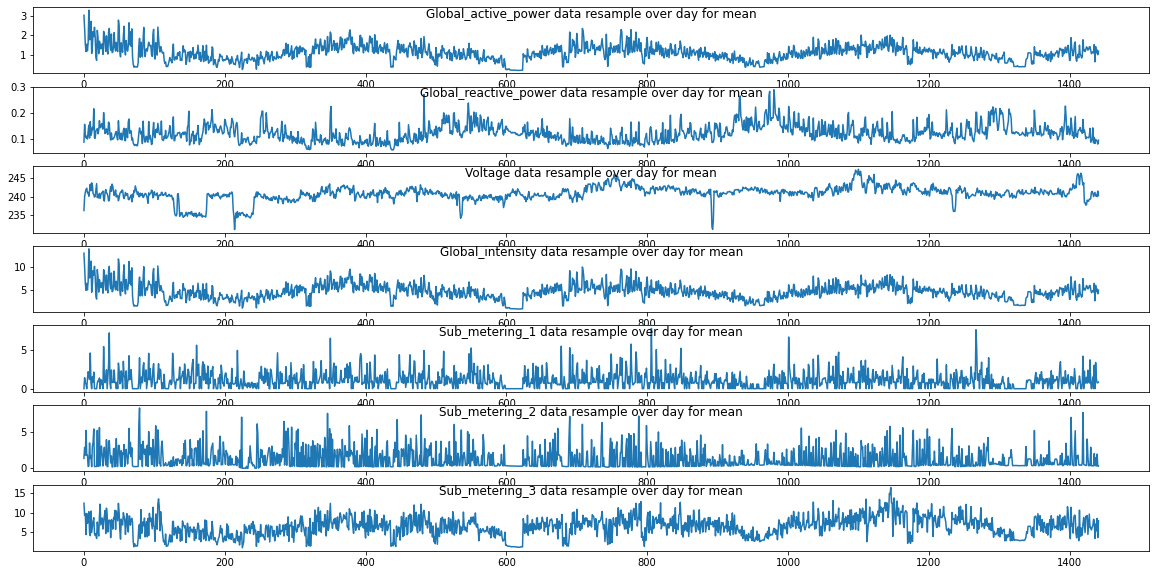

In [ ]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('D').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

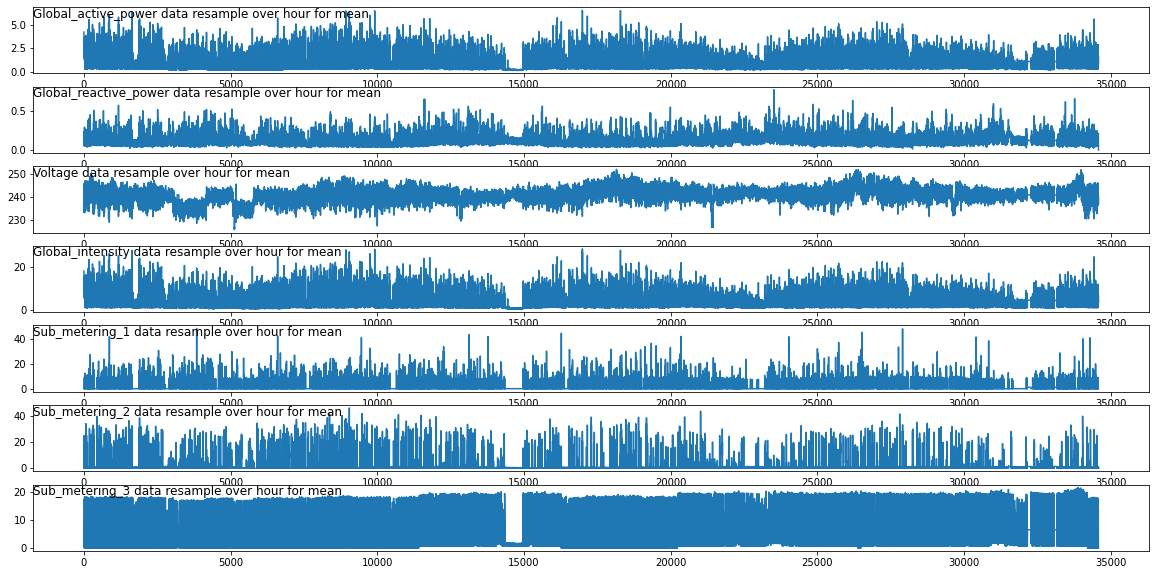

In [ ]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('H').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

From above visualizations:
- The resampling by date or hour is very important because it has a large interaction as expected (changing the periodicity of the system).
- If processing data with large time-scale samples (e.g. monthly), it will affect the model's predictivity. From observation, we can see, it is relatively reasonable to resample data by hour.

In [ ]:
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


From above table, it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated.

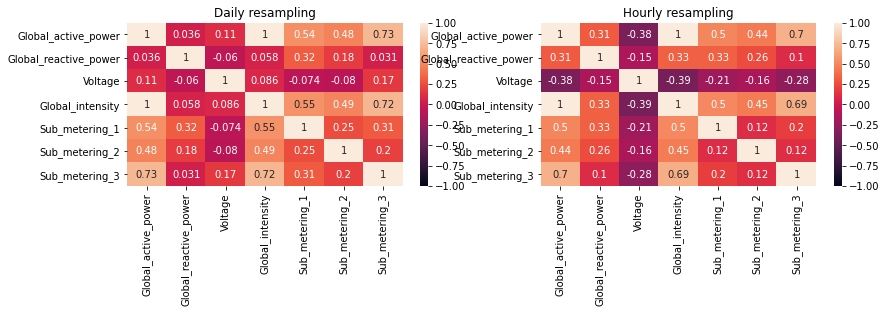

In [ ]:
import seaborn as sns
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(132)
dfd = data.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
  
ax=f.add_subplot(133)
dfh = data.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

It is seen from above that with resampling technique, can change the correlations among features.

# LSTM Data Preparation and fitting

Convert time series to supervised learning problem with frame the supervised learning problem as predicting the Global_active_power at the current time (t) and the Global_active_power measurement and other features at the prior time step.

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]

        # put it all together        
        agg = pd.concat(cols, axis=1)
        agg.columns = names

        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In order to reduce the computation time, and also get a quick result to test the model. We have resampled the data over hour to reduce the size of data from 2075259 to 34589 (data are given in minutes).

In [ ]:
df_resampled = data.resample('h').mean() 
df_resampled.shape

(34589, 7)

So, we will have 7 input series variables and the 1 output variable for 'Global_active_power' at the current time in hour.

## Scalling Data

Scaling for the normalization feature by normalizing the data so that the data has a uniform range of values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_resampled)

df_scaled =pd.DataFrame(scaled)

df_scaled

,0,1,2,3,4,5,6
0,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418
1,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
2,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
3,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
4,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917
...,...,...,...,...,...,...,...
34584,0.248876,0.079294,0.431003,0.240794,0.0,0.000000,0.597061
34585,0.225194,0.069350,0.448732,0.219393,0.0,0.000000,0.000000
34586,0.238534,0.077529,0.418395,0.235055,0.0,0.001436,0.000000
34587,0.161531,0.078993,0.520246,0.158178,0.0,0.022972,0.000000


*In this time series case assignment, take the result from supervised learning problem of "Global_active_power" column because we want to know for the estimated hourly power consumption for the next day.*

In the first step, I will frame the problem to predict the Global_active_power.

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)

In [ ]:
reframed=reframed.rename(columns = {'var1(t)': 'target'}, inplace = False)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),target
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.636816
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.545045
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.509006
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.488550
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.455597


# Splitting Data

For data separation in the case of time series, it is better not to use the traintest split library, because the traintest split is divided randomly. While the time series requires sequential data.

It is not true if the train data are January February March May June July September December, they are asked to predict April.

How to overcome these obstacles:
- Using test train split with random parameter set to "False".
- Using the manual method by cutting data using indexing.
- Using window dataset

window dataset = membagi dataset-dataset kedalam jendela-jendela tertentu.
- bagaimana cara membuat label di data time series? cara nya dengan membaginya dengan window dataset. Misal batas 1160, maka membuat window 1160-1200, semua nilai2 yang berada diantara 1160 sd 1199 itu adalah fitur, dan nilai 1200 tsb merupakan labelnya jadi untuk mendapat label di nilai 1200 ini dengan melihat rentang antara dalam window tsb.

membagi dataset kedalam kotak-kotak tertentu, window2 tertentu dan membuat sendiri labelnya yaitu nilai t=1200, dan sebelum t=1200, antara 1160-1999 (semua nilai yang ada di nilai tsb adalah fiturnya, fitur diantara tsb nilai yang mempengaruhi prediksi), sedangkan prediksinya labelnya sendiri yaitu pada t=1200

In [ ]:
""" optional splitting w/ window

=> how to convert the data into a format acceptable to the model in the case of time series?
Tuliskan fungsi di bawah yang dapat merubah data kita menjadi format yang dapat diterima oleh model. 
Fungsi di bawah menerima sebuah series/atribut kita yang telah di konversi menjadi tipe numpy, lalu 
mengembalikan label dan atribut dari dataset dalam bentuk batch.

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Selanjutnya untuk arsitektur model gunakan 2 buah layer LSTM. Ketika menggunakan 2 buah layer LSTM, 
perhatikan bahwa layer pertama harus memiliki parameter return_sequences yang bernilai True

train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])
"""

'\nTuliskan fungsi di bawah yang dapat merubah data kita menjadi format yang dapat diterima oleh model. \nFungsi di bawah menerima sebuah series/atribut kita yang telah di konversi menjadi tipe numpy, lalu \nmengembalikan label dan atribut dari dataset dalam bentuk batch.\n\ndef windowed_dataset(series, window_size, batch_size, shuffle_buffer):\n    series = tf.expand_dims(series, axis=-1)\n    ds = tf.data.Dataset.from_tensor_slices(series)\n    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)\n    ds = ds.flat_map(lambda w: w.batch(window_size + 1))\n    ds = ds.shuffle(shuffle_buffer)\n    ds = ds.map(lambda w: (w[:-1], w[-1:]))\n    return ds.batch(batch_size).prefetch(1)\n\nSelanjutnya untuk arsitektur model gunakan 2 buah layer LSTM. Ketika menggunakan 2 buah layer LSTM, \nperhatikan bahwa layer pertama harus memiliki parameter return_sequences yang bernilai True\n\ntrain_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)\nmodel = tf.ke

In [ ]:
X.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1)
0,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676
1,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169
2,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809
3,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917
4,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723


In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
# return a tuple representing the dimensionality of the DataFrame
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (27670, 7)
y_train.shape:  (27670,)
X_test.shape:  (6918, 7)
y_test.shape:  (6918,)


# Reshaping train and test sets

Reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].


In [ ]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27670, 1, 7) (27670,) (6918, 1, 7) (6918,)


In [ ]:
X_train.shape[1], X_train.shape[2]

(1, 7)

## Optional - manual splitting w/ indexing and reshaping

Choose one method for the data splitting process, don't use both. You can choose by using the split train test method, or splitting manually using the index

First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data.

In [ ]:
# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values

n_train_time = 365*24

train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]

# split into input and outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
# return a tuple representing the dimensionality of the DataFrame
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (8760, 7)
y_train.shape:  (8760,)
X_test.shape:  (25828, 7)
y_test.shape:  (25828,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


In [ ]:
X_train.shape[1], X_train.shape[2]

(1, 7)

# Modeling

In [ ]:
# import packages
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.models import Sequential
import tensorflow as tf

In [ ]:
# define model architecture
model = Sequential()
model.add(Bidirectional(LSTM(128, 
                        return_sequences=True), 
                        input_shape=(X_train.shape[1], X_train.shape[2]))),
model.add(Bidirectional(LSTM(64))),
model.add(Dense(128, activation='relu')),
model.add(Dropout(0.25)), #Dropout layer nullifies certain random input values to generate a more general dataset and prevent the problem of overfitting.
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.25)),
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 256)            139264    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [ ]:
# note: when starting the learning speed optimizer, use LearningRateScheduler to preview the global optimal learning speed.
"""
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
"""

# define optimizer and initiation of the learning rate optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=sgd, metrics=["mae"])

In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 0.1 and logs.get('val_mae') < 0.1):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [ ]:
import time
time_array = []

start_time = time.time()

# model fit
model_lstm = model.fit(X_train, y_train, 
                       epochs=150, 
                       batch_size=256,
                       validation_data=(X_test, y_test),  
                       verbose=1,
                       callbacks=[callbacks],
                       validation_steps=5,
                       steps_per_epoch=25)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/150
25/25 [==============================] - 31s 181ms/step - loss: 0.0480 - mae: 0.2738 - val_loss: 0.0191 - val_mae: 0.1459
Epoch 2/150
25/25 [==============================] - 2s 70ms/step - loss: 0.0134 - mae: 0.1230 - val_loss: 0.0191 - val_mae: 0.1458
Epoch 3/150
25/25 [==============================] - 2s 67ms/step - loss: 0.0122 - mae: 0.1219 - val_loss: 0.0167 - val_mae: 0.1392
Epoch 4/150
25/25 [==============================] - 2s 69ms/step - loss: 0.0126 - mae: 0.1279 - val_loss: 0.0164 - val_mae: 0.1383
Epoch 5/150
25/25 [==============================] - 1s 55ms/step - loss: 0.0126 - mae: 0.1272 - val_loss: 0.0164 - val_mae: 0.1384
Epoch 6/150
25/25 [==============================] - 1s 60ms/step - loss: 0.0127 - mae: 0.1279 - val_loss: 0.0166 - val_mae: 0.1390
Epoch 7/150
25/25 [==============================] - 2s 65ms/step - loss: 0.0121 - mae: 0.1253 - val_loss: 0.0165 - val_mae: 0.1385
Epoch 8/150
25/25 [==============================] - 2s 65ms/step - loss: 

# Visualization

In [ ]:
# define function plot visualization training and validation process
def plot_history(model_lstm):
    acc = model_lstm.history['mae']
    val_acc = model_lstm.history['val_mae']
    loss = model_lstm.history['loss']
    val_loss = model_lstm.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training MAE: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation MAE: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and mae, validation mae
    plt.figure(figsize=(15, 5))

    # create visualizations for MAE values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train mae')
    plt.plot(val_acc, 'r', label='Validation mae')
    plt.title('Train and validation MAE Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training MAE: 0.10
Training Loss: 0.01
Validation MAE: 0.10
Validation Loss: 0.01




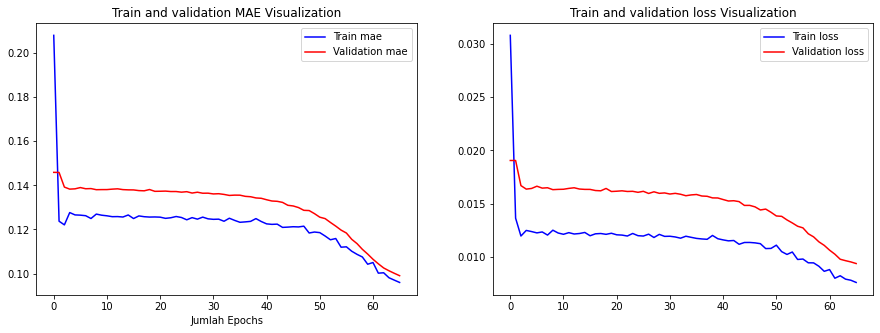

In [ ]:
plot_history(model_lstm)